In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Исследуем данные

In [2]:
# Загрузим тренировочные данные

df_train = pd.read_csv('NBKI_train.csv')
df_train.set_index('Unnamed: 0', inplace = True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,default
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
48417,9,1,0,22,10,500000.0,75.0,75.0,3262,9.0,...,0,0,13,1096,0.125000,0.00,0.011628,0.032787,1,0.0
109120,9,1,5,13,10,29983.0,22.0,22.0,2189,6.0,...,1,0,3,123,0.181818,0.25,0.020408,0.000000,1,0.0
232425,9,1,0,15,10,730000.0,16.0,16.0,2863,8.0,...,0,0,5,1826,0.222222,0.00,0.029851,0.000000,1,0.0
31393,7,1,0,8,10,0.0,68.0,68.0,6,0.0,...,0,0,0,498,0.000000,0.00,0.000000,0.000000,0,1.0
47064,1,1,0,22,10,901484.0,63.0,63.0,3708,10.0,...,0,0,16,182,0.086957,0.00,0.008734,0.023810,1,0.0


In [3]:
# Загрузим тестовые данные

df_test = pd.read_csv('NBKI_test.csv')
df_test.set_index('Unnamed: 0', inplace = True)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
400011,9,1,0,19,11,29748.0,54.0,54.0,17,0.0,...,0,0,0,0,151,1.0,0.0,0.333333,0.0,1
367875,9,1,3,1,11,3000000.0,74.0,74.0,1147,3.0,...,0,0,0,6,1825,0.0,0.0,0.000000,0.0,1
328952,9,1,1,6,11,40999.0,13.0,13.0,2944,8.0,...,0,0,0,1,731,0.0,0.0,0.000000,0.0,1
486218,9,1,0,19,11,5267.0,11.0,11.0,926,3.0,...,0,0,0,0,365,0.0,0.0,0.000000,0.0,1
422556,7,1,3,8,11,144000.0,78.0,5.0,708,2.0,...,0,0,0,0,339,0.0,0.0,0.000000,0.0,0


In [9]:
# датасет с верными значениями

df_true = pd.read_csv('NBKI_y_test.csv')
df_true.set_index('Unnamed: 0', inplace = True)
df_true.head()

,default
Unnamed: 0,
400011,0.0
367875,0.0
328952,0.0
486218,0.0
422556,0.0


In [5]:
# исследуем даатсет df_train

df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,default
count,30007.000000,30007.000000,30007.000000,30007.000000,30007.0,3.000700e+04,28819.000000,28918.000000,30007.000000,29938.000000,...,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000,30007.000000
mean,8.053654,1.023894,2.338121,16.326391,10.0,2.124157e+05,46.050036,45.760841,2531.282401,5.836562,...,0.442330,28.588129,4.205585,4309.415936,0.201044,0.149875,0.065284,0.042948,0.934982,0.033326
std,1.461789,0.266673,1.822649,9.017349,0.0,7.026602e+05,23.971219,23.747816,1301.885619,3.782330,...,0.868359,238.777939,5.947645,8815.823288,0.241771,0.280306,0.119477,0.117184,0.246562,0.179488
min,1.000000,1.000000,0.000000,1.000000,10.0,0.000000e+00,1.000000,1.000000,-480.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000,9.000000,10.0,1.850600e+04,24.000000,24.000000,1589.000000,2.000000,...,0.000000,0.000000,1.000000,310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.000000,1.000000,2.000000,17.000000,10.0,5.000000e+04,50.000000,50.000000,2655.000000,6.000000,...,0.000000,0.000000,2.000000,731.000000,0.125000,0.000000,0.014085,0.000000,1.000000,0.000000
75%,9.000000,1.000000,4.000000,24.000000,10.0,1.500000e+05,66.000000,66.000000,3691.000000,9.000000,...,1.000000,0.000000,5.000000,1844.000000,0.333333,0.250000,0.075000,0.027778,1.000000,0.000000
max,9.000000,4.000000,6.000000,31.000000,10.0,4.072000e+07,99.000000,99.000000,4670.000000,13.000000,...,14.000000,4814.000000,89.000000,29677.000000,1.000000,1.000000,0.983871,1.000000,1.000000,1.000000


In [6]:
# исследуем даатсет df_test

df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
count,29993.000000,29993.000000,29993.000000,29993.000000,29993.0,2.999300e+04,28939.000000,29026.000000,29993.000000,29925.000000,...,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000,29993.000000
mean,8.035942,1.031107,2.628613,16.367819,11.0,2.224184e+05,45.836034,45.726866,2550.056880,5.875054,...,0.076918,0.445371,26.352549,4.246224,4456.489981,0.196511,0.145717,0.063566,0.039696,0.936719
std,1.458747,0.303903,1.782709,8.612153,0.0,6.219813e+05,24.216104,23.952660,1313.031894,3.831630,...,0.571144,0.882855,223.469878,5.992962,8937.013859,0.236951,0.273064,0.117081,0.105296,0.243473
min,1.000000,1.000000,0.000000,1.000000,11.0,0.000000e+00,1.000000,1.000000,-437.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,1.000000,9.000000,11.0,1.880000e+04,24.000000,24.000000,1596.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,329.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.000000,1.000000,3.000000,16.000000,11.0,5.000000e+04,50.000000,50.000000,2679.000000,6.000000,...,0.000000,0.000000,0.000000,2.000000,732.000000,0.125000,0.000000,0.013812,0.000000,1.000000
75%,9.000000,1.000000,4.000000,23.000000,11.0,1.520000e+05,66.000000,66.000000,3718.000000,9.000000,...,0.000000,1.000000,0.000000,6.000000,1887.000000,0.333333,0.200000,0.072848,0.027027,1.000000
max,9.000000,4.000000,6.000000,30.000000,11.0,3.500000e+07,99.000000,99.000000,4700.000000,13.000000,...,25.000000,18.000000,4539.000000,79.000000,29646.000000,1.000000,1.000000,0.980769,1.000000,1.000000


In [19]:
# Поиск пропущенных значений у df_train

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0:
        print(f'Признак {col} имеет пропущенных значений {df_train[col].isnull().sum()}')

Признак 6 имеет пропущенных значений 1188
Признак 7 имеет пропущенных значений 1089
Признак 9 имеет пропущенных значений 69
Признак 10 имеет пропущенных значений 198


In [20]:
# Поиск пропущенных значений у df_test

for col in df_test.columns:
    if df_test[col].isnull().sum() > 0:
        print(f'Признак {col} имеет пропущенных значений {df_test[col].isnull().sum()}')

Признак 6 имеет пропущенных значений 1054
Признак 7 имеет пропущенных значений 967
Признак 9 имеет пропущенных значений 68
Признак 10 имеет пропущенных значений 184


Видно что в перечисленных колонках присутствуют пропущенные значения. Запоним их медианой при построении pipline

# EDA

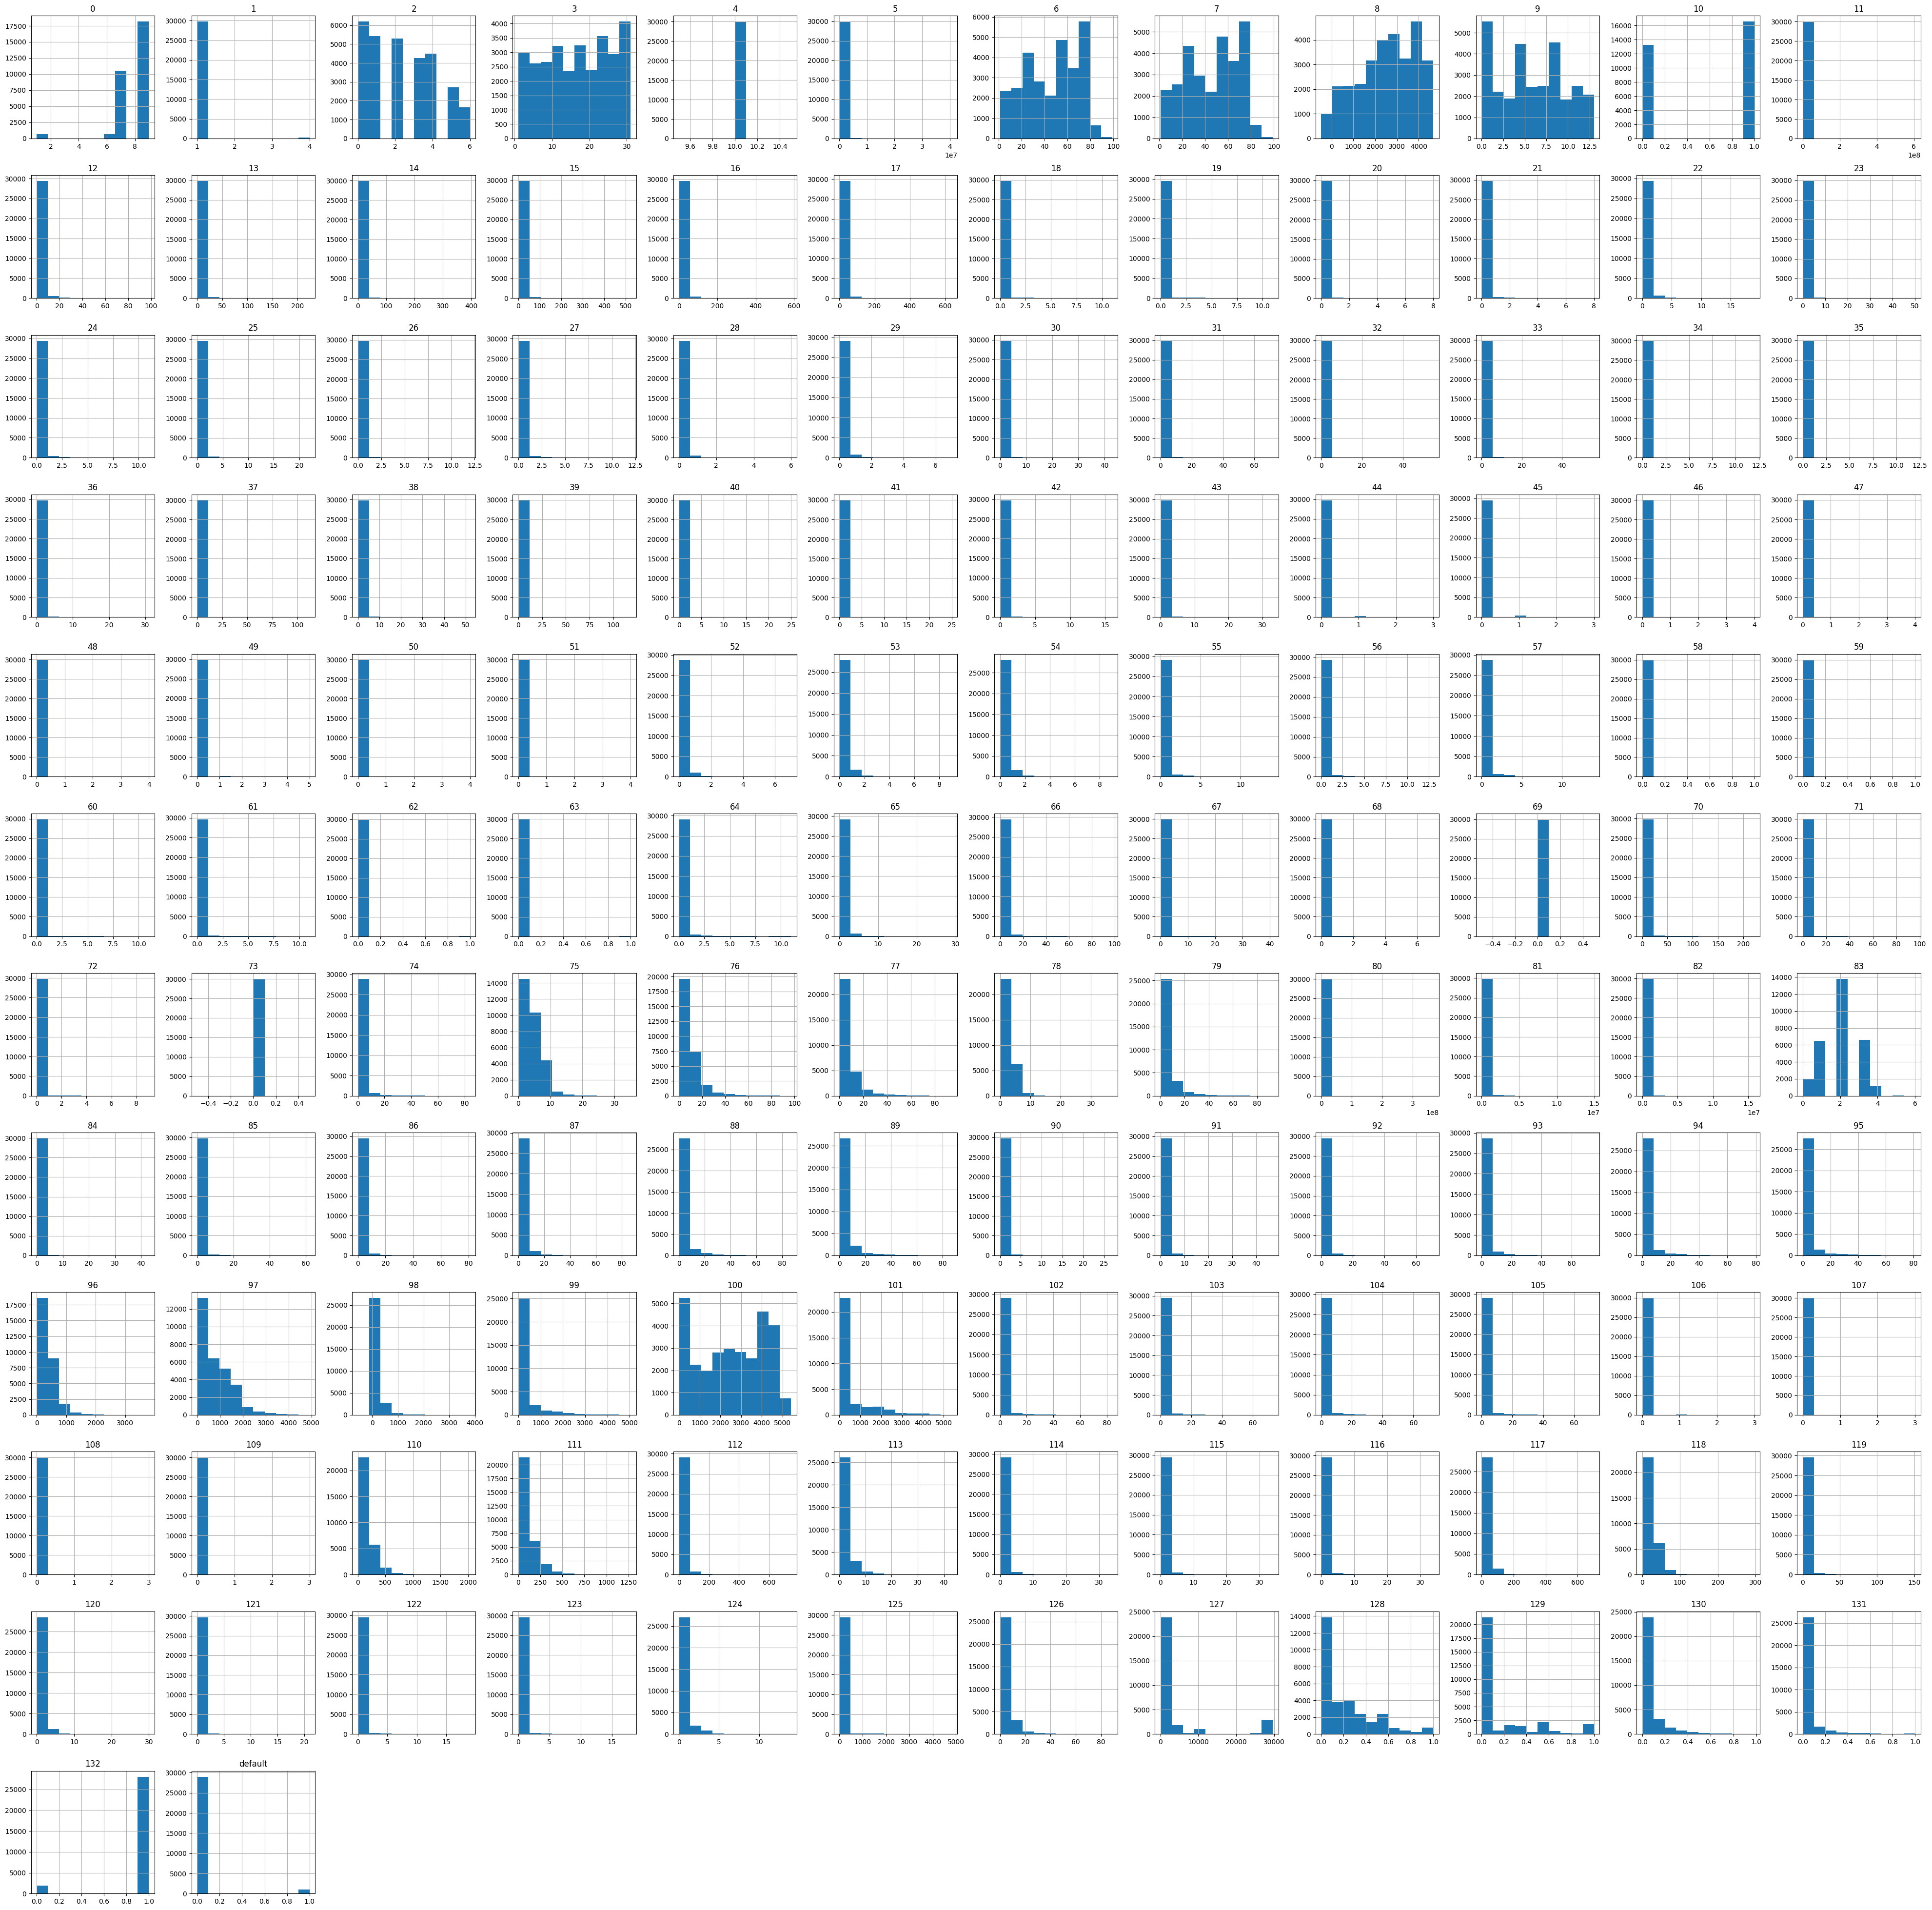

In [7]:
# Распределение переменных у датафрейма df_train

df_train.hist(figsize = (50, 50));

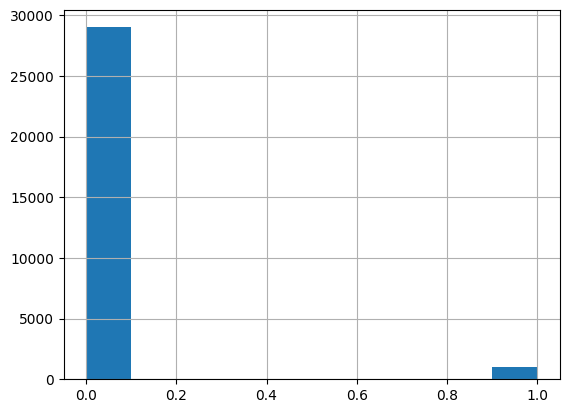

In [10]:
# Распределение целевой переменной у df_train

df_train['default'].hist();

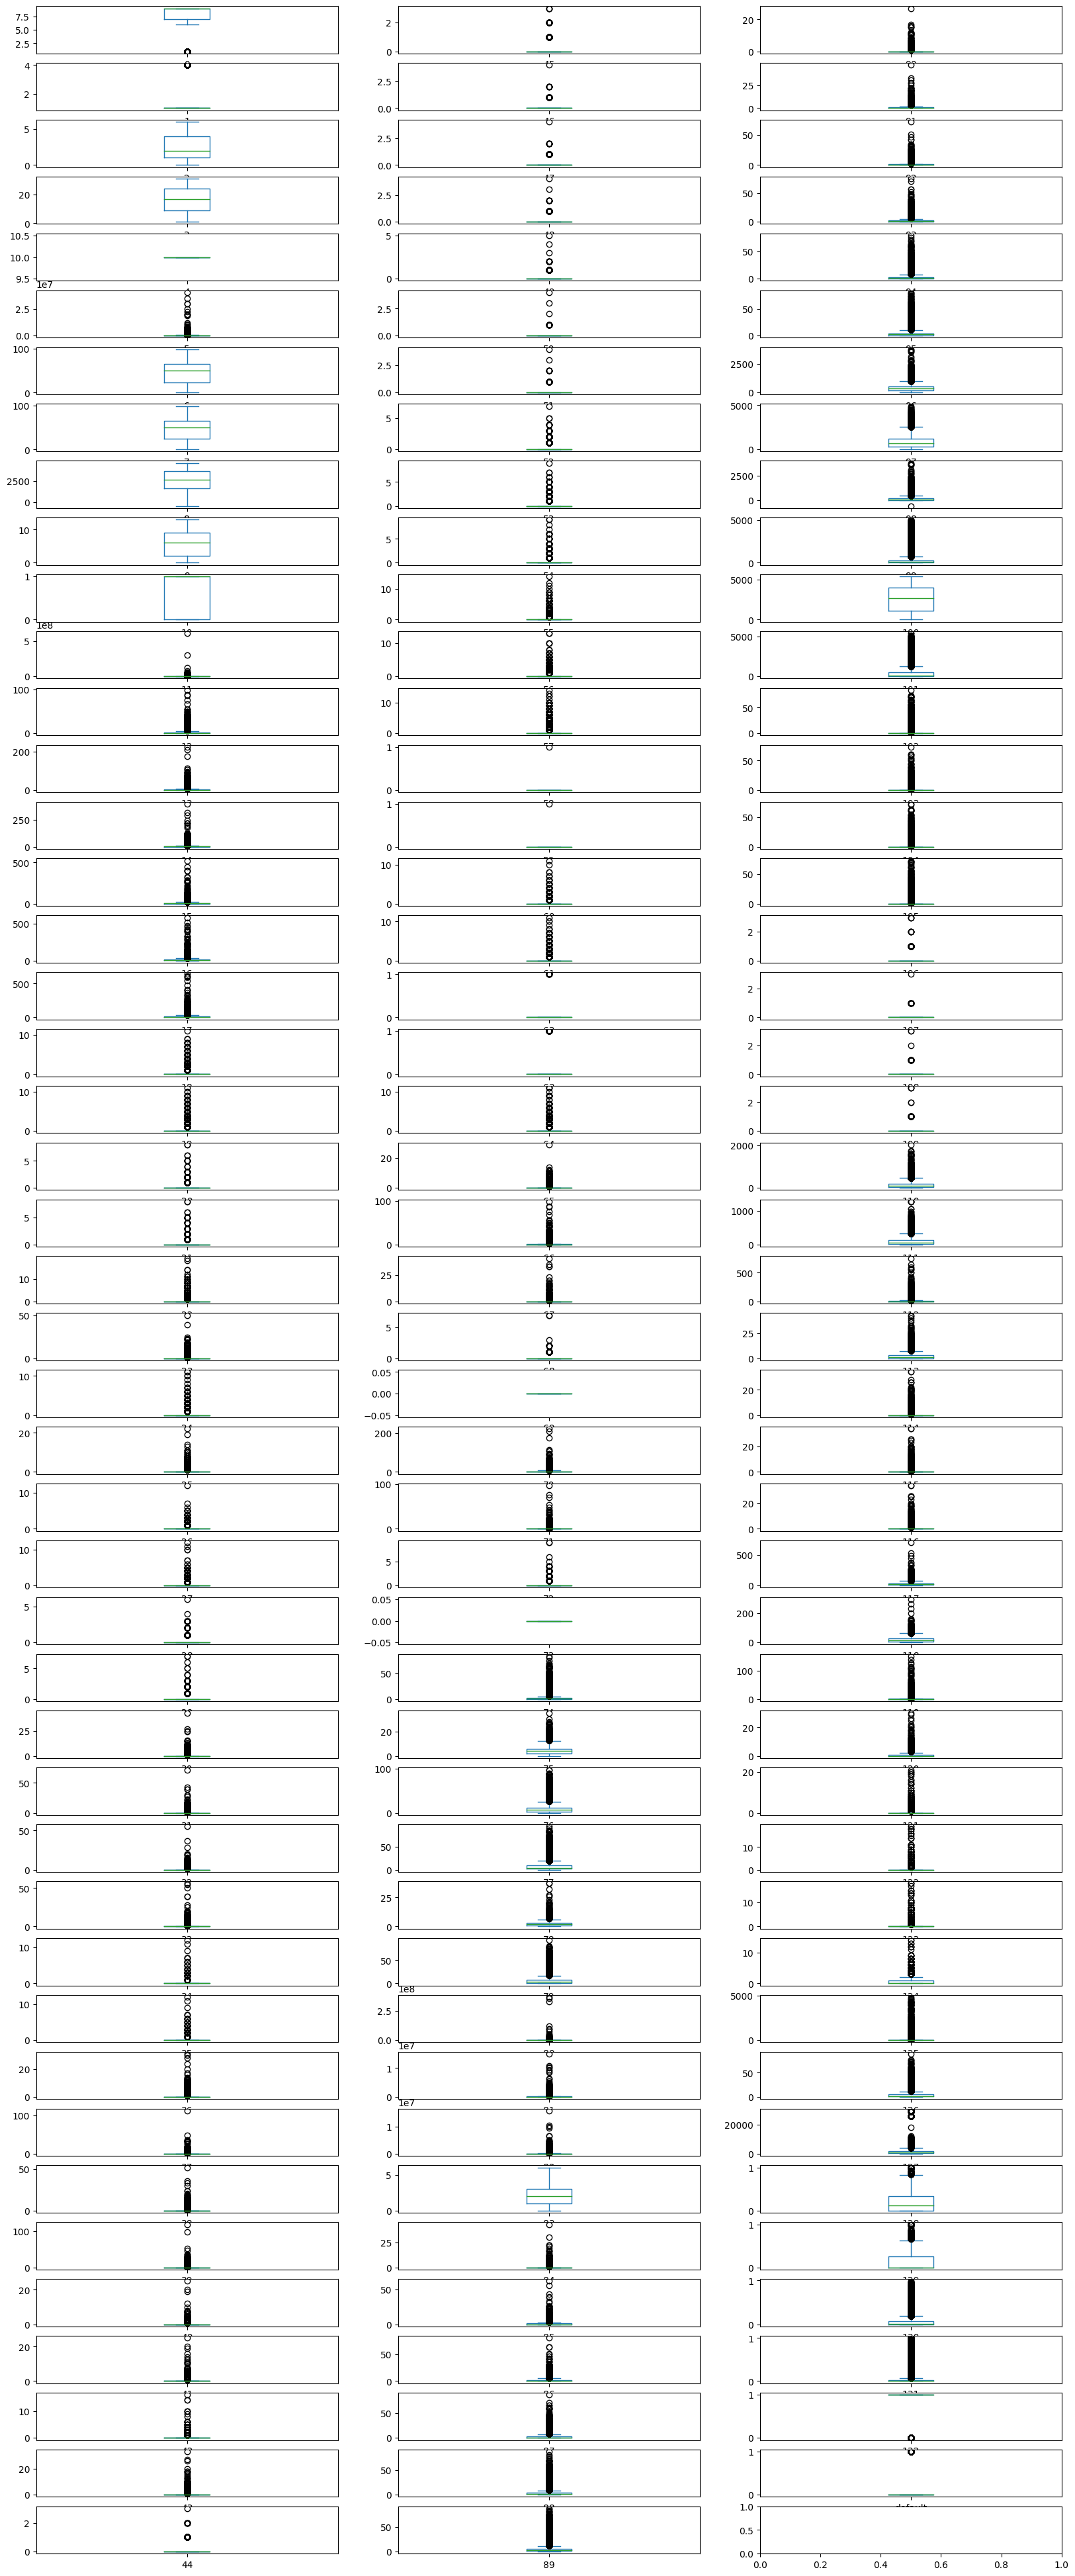

In [16]:
# Выбросы данных у датафрейма df_train

fig, axs = plt.subplots(ncols = 3, nrows = 45, figsize = (20, 50))

row = 0
col = 0

for ax, feature in enumerate(df_train):
    df_train[feature].plot.box(ax = axs[row, col])
    row += 1
    
    if row == 45:
        col += 1
        row = 0
    
plt.show()

Из представленных графиков видно, что данные в основном имеют логнормальное распределение и тбольшое кол-во выбросов необходимо стандартизировать данные перед обучением модели

# Построение Pipline

In [21]:
# Создадим pipline для первичной предобработки данных и снижения размерности

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

preprocessing_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 0.95))
])

Распределение целевой переменной не сбалансированно, поэтому разделим df_train на тренировочные и тестовые данные и стратифицируем целевую переменную

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['default'], axis = 1),
                                                   df_train['default'],
                                                   test_size = 0.3,
                                                   stratify = df_train['default'])

In [23]:
# Предобработка и снижение размерности данных

X_train_preprocessed = preprocessing_pipline.fit_transform(X_train)
X_test_preprocessed = preprocessing_pipline.transform(X_test)

Для обучения модели я использую стекинг. 

Базовые модели:

* Случайный лес;
* Логистическая регрессия с стохастическим градиентным спуском;
* LightGBM.

Финальная модель - Cat Boost

In [32]:
# Инициализируем базовые модели

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

random_forest = RandomForestClassifier(random_state = 17)

sgd = SGDClassifier(loss = 'log_loss',
                   shuffle = True,
                   n_iter_no_change = 10,
                   max_iter = 1000,
                   penalty = 'l1',
                   random_state = 17)

lgb = LGBMClassifier(random_state = 17)


In [33]:
# Гиперпараметры у базовых моделей

from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 400, 600, 1000],
    'max_depth': [3, 4, 5, 7],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}



param_grid_lgb = {
    'n_estimators': [200, 300, 500, 700, 1000],
    'max_depth': [3, 4, 5, 7],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1]
}

In [29]:
# Инициализация метрики качества gini

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

def gini_score(y_true, y_predict_proba):
    """
    Функция для вычисления Gini
    """
    return 2 * roc_auc_score(y_true, y_predict_proba) - 1

gini_scorer = make_scorer(gini_score, needs_proba = True)

In [34]:
# Подбор гиперпараметров для базовых алгоритмов

search_rf = RandomizedSearchCV(random_forest, param_grid_rf, scoring = gini_scorer, cv = 5, n_jobs = -1)
search_rf.fit(X_train_preprocessed, y_train)
best_rf = search_rf.best_estimator_


sgd.fit(X_train_preprocessed, y_train)


search_lgb = RandomizedSearchCV(lgb, param_grid_lgb, scoring = gini_scorer, cv = 5, n_jobs = -1)
search_lgb.fit(X_train_preprocessed, y_train)
best_lgb = search_lgb.best_estimator_


In [35]:
# Подбор гиперпараметров у финальной модели

from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state = 17)

param_grid_cat = {
    'n_estimators': [200, 300, 500, 700, 1000],
    'depth': [3, 4, 5, 7],
    'eta': [0.01, 0.02, 0.03, 0.04, 0.05],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1]
}

search_cat = RandomizedSearchCV(cat, param_grid_cat, scoring = gini_scorer, cv = 5, n_jobs = -1)
search_cat.fit(X_train_preprocessed, y_train)
best_cat = search_cat.best_estimator_

C:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Даниил\AppData\Roaming\Python\Python310\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Даниил\AppData\Roaming\Python\Python310\sit

0:	learn: 0.6603902	total: 176ms	remaining: 1m 27s
1:	learn: 0.6294684	total: 204ms	remaining: 50.7s
2:	learn: 0.5999987	total: 226ms	remaining: 37.4s
3:	learn: 0.5731536	total: 245ms	remaining: 30.4s
4:	learn: 0.5477767	total: 263ms	remaining: 26.1s
5:	learn: 0.5240728	total: 281ms	remaining: 23.1s
6:	learn: 0.5016888	total: 298ms	remaining: 21s
7:	learn: 0.4798017	total: 313ms	remaining: 19.2s
8:	learn: 0.4602941	total: 327ms	remaining: 17.8s
9:	learn: 0.4408046	total: 341ms	remaining: 16.7s
10:	learn: 0.4223727	total: 356ms	remaining: 15.8s
11:	learn: 0.4058538	total: 369ms	remaining: 15s
12:	learn: 0.3906166	total: 381ms	remaining: 14.3s
13:	learn: 0.3761502	total: 395ms	remaining: 13.7s
14:	learn: 0.3628215	total: 407ms	remaining: 13.2s
15:	learn: 0.3490221	total: 419ms	remaining: 12.7s
16:	learn: 0.3365024	total: 431ms	remaining: 12.2s
17:	learn: 0.3253052	total: 442ms	remaining: 11.8s
18:	learn: 0.3147806	total: 454ms	remaining: 11.5s
19:	learn: 0.3044795	total: 466ms	remaining:

162:	learn: 0.1097563	total: 2.29s	remaining: 4.74s
163:	learn: 0.1095896	total: 2.31s	remaining: 4.72s
164:	learn: 0.1094684	total: 2.32s	remaining: 4.71s
165:	learn: 0.1093500	total: 2.33s	remaining: 4.69s
166:	learn: 0.1092005	total: 2.35s	remaining: 4.68s
167:	learn: 0.1090363	total: 2.36s	remaining: 4.66s
168:	learn: 0.1089107	total: 2.37s	remaining: 4.65s
169:	learn: 0.1087240	total: 2.39s	remaining: 4.63s
170:	learn: 0.1085710	total: 2.4s	remaining: 4.62s
171:	learn: 0.1084626	total: 2.41s	remaining: 4.6s
172:	learn: 0.1082950	total: 2.43s	remaining: 4.59s
173:	learn: 0.1082103	total: 2.44s	remaining: 4.57s
174:	learn: 0.1080880	total: 2.45s	remaining: 4.56s
175:	learn: 0.1079814	total: 2.47s	remaining: 4.54s
176:	learn: 0.1078407	total: 2.48s	remaining: 4.53s
177:	learn: 0.1077086	total: 2.5s	remaining: 4.52s
178:	learn: 0.1075767	total: 2.51s	remaining: 4.5s
179:	learn: 0.1074793	total: 2.52s	remaining: 4.49s
180:	learn: 0.1073751	total: 2.54s	remaining: 4.47s
181:	learn: 0.10

326:	learn: 0.0933498	total: 4.39s	remaining: 2.32s
327:	learn: 0.0932510	total: 4.41s	remaining: 2.31s
328:	learn: 0.0931857	total: 4.42s	remaining: 2.3s
329:	learn: 0.0930848	total: 4.43s	remaining: 2.28s
330:	learn: 0.0930182	total: 4.45s	remaining: 2.27s
331:	learn: 0.0929324	total: 4.46s	remaining: 2.25s
332:	learn: 0.0928279	total: 4.47s	remaining: 2.24s
333:	learn: 0.0927489	total: 4.48s	remaining: 2.23s
334:	learn: 0.0926710	total: 4.49s	remaining: 2.21s
335:	learn: 0.0925951	total: 4.5s	remaining: 2.2s
336:	learn: 0.0924948	total: 4.52s	remaining: 2.18s
337:	learn: 0.0924354	total: 4.53s	remaining: 2.17s
338:	learn: 0.0923311	total: 4.54s	remaining: 2.16s
339:	learn: 0.0922234	total: 4.55s	remaining: 2.14s
340:	learn: 0.0921453	total: 4.57s	remaining: 2.13s
341:	learn: 0.0920436	total: 4.58s	remaining: 2.12s
342:	learn: 0.0919617	total: 4.59s	remaining: 2.1s
343:	learn: 0.0918138	total: 4.61s	remaining: 2.09s
344:	learn: 0.0917039	total: 4.62s	remaining: 2.08s
345:	learn: 0.09

487:	learn: 0.0808038	total: 6.49s	remaining: 159ms
488:	learn: 0.0807392	total: 6.5s	remaining: 146ms
489:	learn: 0.0806897	total: 6.51s	remaining: 133ms
490:	learn: 0.0805921	total: 6.52s	remaining: 120ms
491:	learn: 0.0805127	total: 6.54s	remaining: 106ms
492:	learn: 0.0804541	total: 6.55s	remaining: 93ms
493:	learn: 0.0803830	total: 6.56s	remaining: 79.7ms
494:	learn: 0.0803388	total: 6.57s	remaining: 66.4ms
495:	learn: 0.0803014	total: 6.58s	remaining: 53.1ms
496:	learn: 0.0802390	total: 6.6s	remaining: 39.8ms
497:	learn: 0.0801991	total: 6.61s	remaining: 26.5ms
498:	learn: 0.0801288	total: 6.62s	remaining: 13.3ms
499:	learn: 0.0800210	total: 6.64s	remaining: 0us


In [36]:
# Инициализация стекинга

from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state = 17)

estimators = [('rf', best_rf), ('sgd', sgd), ('lgb', best_lgb)]
stacking_classifier = StackingClassifier(estimators = estimators, final_estimator = best_cat)

In [37]:
# Обучение стекинга

stacking_classifier.fit(X_train_preprocessed, y_train)

0:	learn: 0.6567028	total: 6.39ms	remaining: 3.19s
1:	learn: 0.6232889	total: 12.7ms	remaining: 3.15s
2:	learn: 0.5917486	total: 18.4ms	remaining: 3.05s
3:	learn: 0.5617269	total: 24.3ms	remaining: 3.01s
4:	learn: 0.5343403	total: 30.3ms	remaining: 3s
5:	learn: 0.5081075	total: 36ms	remaining: 2.96s
6:	learn: 0.4838019	total: 41.7ms	remaining: 2.94s
7:	learn: 0.4608216	total: 47.6ms	remaining: 2.92s
8:	learn: 0.4393107	total: 53.3ms	remaining: 2.9s
9:	learn: 0.4193071	total: 59.5ms	remaining: 2.91s
10:	learn: 0.4016282	total: 65.8ms	remaining: 2.92s
11:	learn: 0.3845349	total: 72.2ms	remaining: 2.94s
12:	learn: 0.3681777	total: 78.4ms	remaining: 2.94s
13:	learn: 0.3530579	total: 84.7ms	remaining: 2.94s
14:	learn: 0.3390997	total: 90.8ms	remaining: 2.94s
15:	learn: 0.3261196	total: 96.9ms	remaining: 2.93s
16:	learn: 0.3137065	total: 103ms	remaining: 2.92s
17:	learn: 0.3024384	total: 109ms	remaining: 2.92s
18:	learn: 0.2916529	total: 115ms	remaining: 2.92s
19:	learn: 0.2816485	total: 121

179:	learn: 0.1190797	total: 1.04s	remaining: 1.84s
180:	learn: 0.1190566	total: 1.04s	remaining: 1.84s
181:	learn: 0.1190189	total: 1.05s	remaining: 1.84s
182:	learn: 0.1189911	total: 1.06s	remaining: 1.83s
183:	learn: 0.1189645	total: 1.06s	remaining: 1.83s
184:	learn: 0.1189192	total: 1.07s	remaining: 1.82s
185:	learn: 0.1188943	total: 1.07s	remaining: 1.81s
186:	learn: 0.1188708	total: 1.08s	remaining: 1.81s
187:	learn: 0.1188572	total: 1.08s	remaining: 1.8s
188:	learn: 0.1188139	total: 1.09s	remaining: 1.79s
189:	learn: 0.1187871	total: 1.1s	remaining: 1.79s
190:	learn: 0.1187554	total: 1.1s	remaining: 1.78s
191:	learn: 0.1187317	total: 1.11s	remaining: 1.78s
192:	learn: 0.1187114	total: 1.11s	remaining: 1.77s
193:	learn: 0.1186693	total: 1.12s	remaining: 1.77s
194:	learn: 0.1186283	total: 1.13s	remaining: 1.76s
195:	learn: 0.1186031	total: 1.13s	remaining: 1.76s
196:	learn: 0.1185885	total: 1.14s	remaining: 1.75s
197:	learn: 0.1185717	total: 1.14s	remaining: 1.74s
198:	learn: 0.1

352:	learn: 0.1149463	total: 2.04s	remaining: 851ms
353:	learn: 0.1149201	total: 2.05s	remaining: 845ms
354:	learn: 0.1149012	total: 2.06s	remaining: 840ms
355:	learn: 0.1148830	total: 2.06s	remaining: 834ms
356:	learn: 0.1148760	total: 2.07s	remaining: 828ms
357:	learn: 0.1148601	total: 2.07s	remaining: 823ms
358:	learn: 0.1148288	total: 2.08s	remaining: 817ms
359:	learn: 0.1148136	total: 2.09s	remaining: 811ms
360:	learn: 0.1147945	total: 2.09s	remaining: 805ms
361:	learn: 0.1147737	total: 2.1s	remaining: 800ms
362:	learn: 0.1147393	total: 2.1s	remaining: 794ms
363:	learn: 0.1147303	total: 2.11s	remaining: 788ms
364:	learn: 0.1147172	total: 2.11s	remaining: 782ms
365:	learn: 0.1147010	total: 2.12s	remaining: 776ms
366:	learn: 0.1146820	total: 2.13s	remaining: 770ms
367:	learn: 0.1146744	total: 2.13s	remaining: 764ms
368:	learn: 0.1146556	total: 2.14s	remaining: 759ms
369:	learn: 0.1146258	total: 2.14s	remaining: 753ms
370:	learn: 0.1146057	total: 2.15s	remaining: 747ms
371:	learn: 0.

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=7,
                                                       min_samples_leaf=2,
                                                       min_samples_split=10,
                                                       n_estimators=600,
                                                       random_state=17)),
                               ('sgd',
                                SGDClassifier(loss='log_loss',
                                              n_iter_no_change=10, penalty='l1',
                                              random_state=17)),
                               ('lgb',
                                LGBMClassifier(learning_rate=0.01, max_depth=7,
                                               n_estimators=700,
                                               random_state=17, subsample=1))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x000002550D2420B0>)

In [41]:
# Оценка качества моделей в разрезе признака 0

print(f'RandomForestClassifier - {gini_score(y_test, best_rf.predict_proba(X_test_preprocessed)[:, 1])}')
print(f'SGDClassifier - {gini_score(y_test, sgd.predict_proba(X_test_preprocessed)[:, 1])}')
print(f'LGBMClassifier - {gini_score(y_test, best_lgb.predict_proba(X_test_preprocessed)[:, 1])}')
print(f'stacking_classifier - {gini_score(y_test, stacking_classifier.predict_proba(X_test_preprocessed)[:, 1])}')

RandomForestClassifier - 0.5478478685510744
SGDClassifier - 0.33108966256846295
LGBMClassifier - 0.6230893561607109
stacking_classifier - 0.6190861388793139


Из оценок качетва видно что качество LGBMClassifier больше нежели у остальных алгоритмов. Используем его для предсказания целевой переменной на валидационной выборке

# Предсказание для NBKI_test

In [47]:
# Подготовим данные из валидационной выборки

df_test_preprocessed = preprocessing_pipline.transform(df_test)
y_true = df_true


In [48]:
# Предскажем целевую переменную и оценим качество предсказания

test_prediction = best_lgb.predict(df_test_preprocessed)

print(f'LGBMClassifier - {gini_score(y_true, best_lgb.predict_proba(df_test_preprocessed)[:, 1])}')

LGBMClassifier - 0.5562780169511614


In [56]:
# Сохраним модель

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_lgb, f)